# Activity: Explore probability distributions

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Import relevant libraries, packages, and modules. For this lab, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [1]:
# Import relevant libraries, packages, and modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
data = pd.read_csv("modified_c4_epa_air_quality.csv")

## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [3]:
# Display first 10 rows of the data.
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [4]:
# Display number of rows, number of columns.
data.shape

(260, 8)

Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

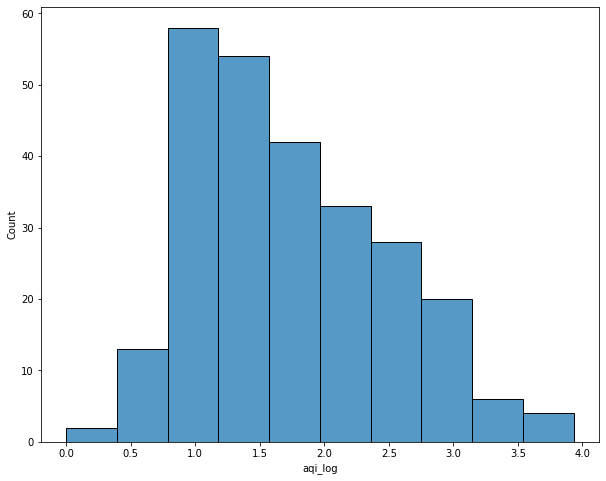

In [5]:
# Create a histogram to visualize distribution of aqi_log.
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=data, x='aqi_log', bins=10, ax=ax)
plt.show()

**Question:** What do you observe about the shape of the distribution from the histogram? 

- It looks like a bell shaped distribution with slight skeweness to the right.

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


 As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [6]:
# Define variable for aqi_log mean.
aqi_log_mean = data['aqi_log'].mean()
# Print out the mean.
print(f'Mean of `aqi_log` is {aqi_log_mean:.3f}')

Mean of `aqi_log` is 1.767


In [7]:
# Define variable for aqi_log standard deviation.
aqi_log_std = data['aqi_log'].std()

# Print out the standard deviation.
print(f'Standard deviation of `aqi_log` is {aqi_log_std:.3f}')

Standard deviation of `aqi_log` is 0.715


Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [8]:
# Define variable for lower limit, 1 standard deviation below the mean.
lwr_limit_1std =  aqi_log_mean - 1 * aqi_log_std

# Define variable for upper limit, 1 standard deviation above the mean.
upr_limit_1std =  aqi_log_mean + 1 * aqi_log_std

# Display lower_limit, upper_limit.
print(f'The lower and apper limits are: {lwr_limit_1std:.3f} and {upr_limit_1std:.3f}')

The lower and apper limits are: 1.052 and 2.482


In [9]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
((data["aqi_log"] >= lwr_limit_1std) & (data["aqi_log"] <= upr_limit_1std)).mean()

0.7615384615384615

Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [10]:
# Define variable for lower limit, 2 standard deviations below the mean.
lwr_limit_2std =  aqi_log_mean - 2 * aqi_log_std

# Define variable for upper limit, 2 standard deviations below the mean.
upr_limit_2std =  aqi_log_mean + 2 * aqi_log_std

# Display lower_limit, upper_limit.
print(f'The lower and apper limits are: {lwr_limit_2std:.3f} and {upr_limit_2std:.3f}')

The lower and apper limits are: 0.337 and 3.196


In [11]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.
((data["aqi_log"] >= lwr_limit_2std) & (data["aqi_log"] <= upr_limit_2std)).mean()

0.9576923076923077

Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [12]:
# Define variable for lower limit, 3 standard deviations below the mean.
lwr_limit_3std =  aqi_log_mean - 3 * aqi_log_std

# Define variable for upper limit, 3 standard deviations above the mean.
upr_limit_3std =  aqi_log_mean + 3 * aqi_log_std

# Display lower_limit, upper_limit.
print(f'The lower and apper limits are: {lwr_limit_3std:.3f} and {upr_limit_3std:.3f}')

The lower and apper limits are: -0.377 and 3.911


In [13]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.
((data["aqi_log"] >= lwr_limit_3std) & (data["aqi_log"] <= upr_limit_3std)).mean()

0.9961538461538462

## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 

- About 76.15% of the data falls within 1 standard deviation of the mean.
- About 95.77% of the data falls within 2 standard deviation of the mean.
- About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal.

**Question:** How would you use z-score to find outliers? 

[Write your response here. Double-click (or enter) to edit.]

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [14]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
data["z_score"] = stats.zscore(data["aqi_log"])

# Display the first 5 rows to ensure that the new column was added.
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [15]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
data.loc[(data['z_score'] < -3) | (data['z_score'] > 3),:]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


**Question:** What do you observe about potential outliers based on the calculations?


- The `aqi_log` for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

**Question:** Why is outlier detection an important part of this project? 

- Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

- Plotting the data using a histogram, then observing the shape, enables you to visually determine whether the data is normally distributed.
- The empirical rule can be used to verify whether a distribution is normal.
- The mean and standard deviation are important measures when applying the empirical rule to a distribution.
- Z-score allows you to identify potenial outliers in the data.

**What summary would you provide to stakeholders? Consider the distribution of the data and which sites would benefit from additional research.**

- The distribution of the `aqi_log` data is approximately normal.
- Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites. 
- Consider allocating more resources toward further examining this site in order to improve its air quality.

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.